In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('C:\\Users\\vedas\\OneDrive\\Documents\\Python Scripts\\Data\\Wholesale customers data.csv')

# Select relevant columns for clustering
X = data.iloc[:, 2:]

In [3]:
# Define a distance function (Euclidean distance)
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

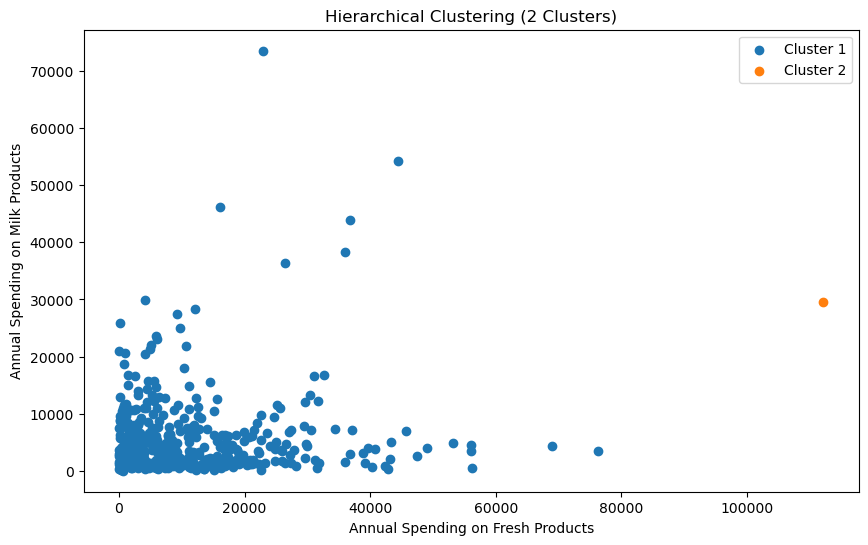

In [4]:
def hierarchical_clustering(data, num_clusters):
    n = data.shape[0]
    distances = np.zeros((n, n))
    
    # Compute distances between all pairs of data points
    for i in range(n):
        for j in range(n):
            distances[i][j] = euclidean_distance(data[i], data[j])
    
    # Initialize clusters: each point is its own cluster
    clusters = [[i] for i in range(n)]
    
    # Merge clusters until desired number of clusters is reached
    while len(clusters) > num_clusters:
        min_distance = np.inf
        merge_indices = ()

        # Find the pair of clusters with the smallest distance
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_distance = np.mean([distances[a][b] for a in clusters[i] for b in clusters[j]])
                if cluster_distance < min_distance:
                    min_distance = cluster_distance
                    merge_indices = (i, j)
        
        # Merge the clusters with the smallest distance
        clusters[merge_indices[0]] += clusters[merge_indices[1]]
        del clusters[merge_indices[1]]
    
    return clusters

# Perform hierarchical clustering to divide the dataset into 2 clusters
num_clusters = 2
clusters = hierarchical_clustering(X.values, num_clusters)

# Plot the results
plt.figure(figsize=(10, 6))
for i, cluster in enumerate(clusters):
    cluster_points = X.values[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')
plt.xlabel('Annual Spending on Fresh Products')
plt.ylabel('Annual Spending on Milk Products')
plt.title('Hierarchical Clustering (2 Clusters)')
plt.legend()
plt.show()



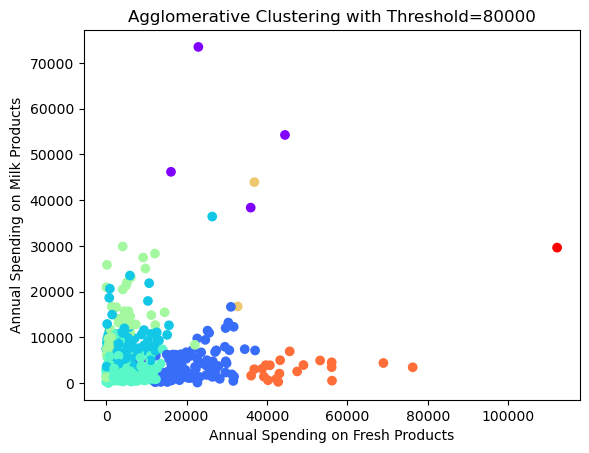

In [5]:
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
data = pd.read_csv('C:\\Users\\vedas\\OneDrive\\Documents\\Python Scripts\\Data\\Wholesale customers data.csv')

# Select relevant columns for clustering
X = data.iloc[:, 2:]

# Define a function for clustering with a given threshold
def hierarchical_clustering_threshold(data, threshold):
    model = AgglomerativeClustering(distance_threshold=threshold, n_clusters=None)
    labels = model.fit_predict(data)
    return labels

# Set the threshold
threshold = 80000

# Perform hierarchical clustering with the threshold
labels = hierarchical_clustering_threshold(X, threshold)

# Plot the results
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Annual Spending on Fresh Products')
plt.ylabel('Annual Spending on Milk Products')
plt.title(f'Agglomerative Clustering with Threshold={threshold}')
plt.show()

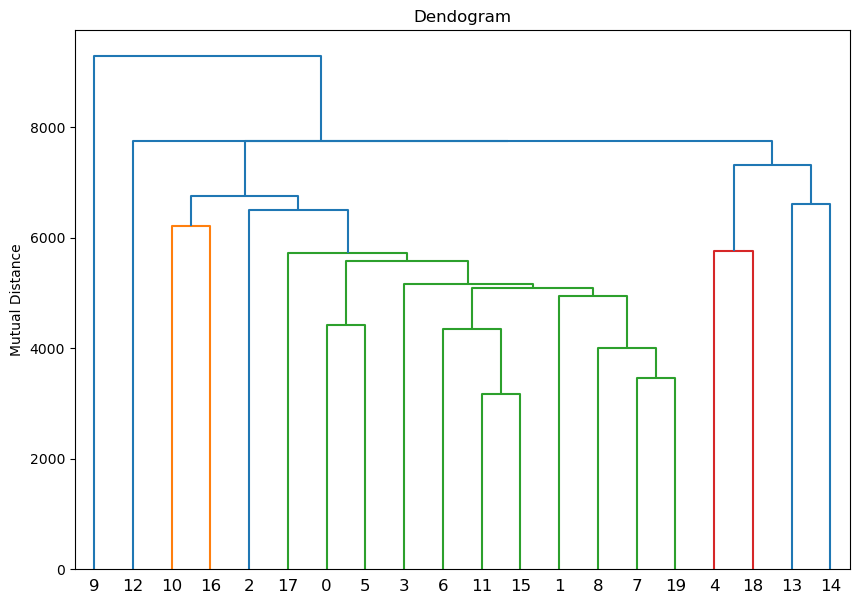

In [6]:
import scipy.cluster.hierarchy as shc # importing it to represent dendogram

plt.figure(figsize=(10,7))
plt.title("Dendogram")
#plt.dendogram
shc.dendrogram(shc.linkage(data[:20], method='single'))
plt.ylabel("Mutual Distance")
plt.show()